# The World Factbook Dataset

In this notebook we will be using Python to explore and discover useful information from The World Factbook dataset which contains information on the history, economy, energy, geography, communications and other indicators for 227 countries of the world.

The World Factbook is one of the US Government's most accessed publications and it is continuosly being updated.
Source: https://www.cia.gov/library/publications/the-world-factbook/



## 1. Importing the libraries. These will be our tools:

In [210]:
# data processing
import pandas as pd    

# data visualization
import seaborn as sns  
import matplotlib.pyplot as plt

## 2. Loading and inspecting the dataset

In [211]:
data = pd.read_csv("countries_of_the_world.csv")  # loads a CSV document(Comma Separated Values) into a DataFrame tool


In [212]:
data.columns #look at the columns of the dataset


Index(['country', 'region', 'population', 'area', 'density', 'coastline',
       'migration', 'infant_mortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service'],
      dtype='object')

### Columns explained

population       : estimates from the US Bureau of the Census based on statistics from population censuses

area(sq. mi.)    : sum of all land and water areas delimited by international boundaries and/or coastlines

density          : population per sq. mi.

coastline        : total length of the boundary between the land area (including islands) and the sea (coast/area ratio)

migration        : difference between the number of persons entering and leaving a country during the year per 1,000 persons

infant_mortality : number of deaths per 1,000 live births of children under one year of age

gdp (per capita) : the gross domestic product or value of all final goods and services produced within a nation in a given year. the GDP per capita is the GDP divided by population

literacy(%)      : age 15 and over can read and write, expressed as a percentage

phones(per 1000) : number of mobile phone users per 1,000 persons

arable(%)        : arable land cultivated for crops like wheat, maize, and rice that are replanted after each harvest

crops(%)         : land cultivated for crops like citrus, coffee, and rubber that are not replanted after each harvest, and includes land under flowering shrubs, fruit trees, nut trees, and vines

climate          : description of typical weather regimes throughout the year, split into 4 categories of extremes:

                   driest places on earth (average annual precipitation)        = 1
                   
                   wettest places on earth (average annual precipitation)       = 2
                   
                   coldest places on earth (lowest average monthly temperature) = 3
                   
                   hottest places on earth (highest average monthly temperature)= 4
                   
birthrate        : average annual number of births during a year per 1,000 persons in the population at midyear

deathrate        : average annual number of deaths during a year per 1,000 population at midyear

In [213]:
data.shape #number of rows and columns

(227, 19)

In [214]:
data.head() #display the first 5 rows from the dataset. 

#you can also show more, e.g. uncomment below lines and run them separately, what do you see? 
#data.head(0)
#data.head(1)
#data.head(10)


,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,3.0,8.71,6.25,NaN,NaN,NaN


In [215]:
data.tail()  #show last 5 rows

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,2.0,41.00,19.93,0.220,0.290,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,2.0,28.01,21.84,0.179,0.243,0.579


### Did you notice any "NaN" values in the table? 

NaN (or Not a Number) are missing values in the table. These can cause issues when we want to do mathematical operations on the data. Lets see how many of these we have in our data and then lets remove them.

In [216]:
data.isnull().sum()  # counts how many NULL (missing) values there are for each of the columns

country              0
region               0
population           0
area                 0
density              0
coastline            0
migration            3
infant_mortality     3
gdp                  1
literacy            18
phones               4
arable               2
crops                2
climate             22
birthrate            3
deathrate            4
agriculture         15
industry            16
service             15
dtype: int64

To fill in the missing numbers, one technique we can use is to fill in with the mean of the column

In [217]:
data.fillna(data.mean(), inplace=True) #using the "fillna" method and filling in with the column mean

### Indexing

In [218]:
#what if we wanted to see the values from just one column in the table?

data["area"].head()  # data["area"] - selects just the area column

#try it out with other combinations of columns and show more than the first 5 rows! 

0     647500
1      28748
2    2381740
3        199
4        468
Name: area, dtype: int64

In [219]:
selected_rows = data.head(10)          # select first 10 rows
selected_rows.loc[:, ["area","gdp"]] 

#"loc" is a method call that takes 2 arguments: 
#first one, the ":" identifies the rows we want to select. e.g. ":" = all rows, "1:5" = row 1 to 5
#second one, "["area","gdp"]" identifies the columns we want to select, in this case we select the "area" and "gdp" columns

#other examples you can try below. you can change the parameters and see what happens!

#selected_rows.loc[:5,:]
#selected_rows.loc[::-1,["area"]]

,area,gdp
0,647500,700.0
1,28748,4500.0
2,2381740,6000.0
3,199,8000.0
4,468,19000.0
5,1246700,1900.0
6,102,8600.0
7,443,11000.0
8,2766890,11200.0
9,29800,3500.0


In [220]:
#How can we see all countries in Western Europe?

data[data["region"] == "WESTERN EUROPE"].head() #selects all rows where the region is equal to "WESTERN EUROPE"

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,3.000000,8.71,6.25,0.150844,0.282711,0.565283
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.000000,452.2,16.91,0.86,3.000000,8.74,9.76,0.018000,0.304000,0.678000
19,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,98.000000,462.6,23.28,0.40,3.000000,10.38,10.27,0.010000,0.240000,0.749000
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.000000,614.6,54.02,0.19,3.000000,11.13,10.36,0.018000,0.246000,0.735000
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,82.838278,503.8,2.14,0.00,2.139024,14.05,8.70,0.270000,0.110000,0.620000


### Sorting

In [230]:
data.sort_values(by="area", ascending=True).head() # here we are passing parameters by name

#try sorting by diferent columns! 

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.00,7.75,5.43,27000.0,99.000000,1035.6,0.0,0.0,2.139024,9.19,12.91,0.170000,0.282711,0.565283
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,82.838278,877.7,0.0,0.0,2.139024,10.74,9.31,0.150844,0.282711,0.565283
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,82.838278,143.0,0.0,0.0,2.000000,24.76,6.70,0.150844,0.282711,0.565283
209,Tuvalu,OCEANIA,11810,26,454.2,92.31,0.00,20.03,1100.0,82.838278,59.3,0.0,0.0,2.000000,22.18,7.11,0.166000,0.272000,0.562000
122,Macau,ASIA (EX. NEAR EAST),453125,28,16183.0,146.43,4.86,4.39,19400.0,94.500000,384.9,0.0,0.0,2.000000,8.48,4.47,0.001000,0.072000,0.927000


### Grouping rows together by a specific column

In [222]:
#How many coutries does each region have? 

countries_in_region = data.groupby("region").size()

In [223]:
#Using the sorting method learned above, can you try sorting the countries in region? 

#countries_in_region. ...write your code here

## 3. Exploring and discovering information from the dataset

### 3.1. What are the top 10 countries with highest GDP?

In [224]:
#using what we just learned, we can combine "sort_values" with "head" to show top rows
#uncomment the line below and fill in the missing dots to show what we want

#data.sort_values(by=..., ascending=...).head(...)


### 3.2. What are the top 10 most crowded countries?


In [225]:
#write your answer here

### 3.3. What are the driest countries in the world?


In [226]:
#we have a column "climate" which contains 4 categories. the driest climate has category 1

#driest_countries = ...write your answer here

### 3.4. What is the driest country in the world that also has the largest area?

In [227]:
#write your answer here

## 4. Visualizing information from the dataset

Vizualizing data in a graphical format enables us to get a better understanding of large amounts 
of information and try to identify trends/patterns that might be present in our dataset. It is a very powerful tool that enables
scientists to grasp dificult concepts more easily. 

Some common types of data visualization:

    bar and column charts
    pie charts
    distribution plot (see how values are distributed)

### 4.1. What is the distribution of the infant mortality rates? 

In [228]:
#IMR (infant mortality rate) - the number of deaths per 1,000 live births of children under one year of age

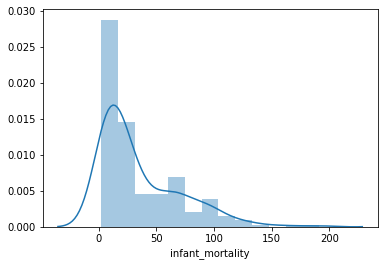

In [229]:
sns.distplot(data["infant_mortality"]) 

##### What do you think the above plot is showing us? 